<a href="https://colab.research.google.com/github/hayrettins/spotify-machine-learning/blob/main/CS210_Spring2021_Report_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Spotify Song & Genre Analysis, Popularity Prediction and Building a Simple Recommendation System - Group 71]

Group Members:

Oğuz Bor 24940

Hayrettin Çağan Şendağ 27013

## Introduction
We are planning to use the data_w_genres.csv dataset to chronologically present the changes over the genres in the from of various features.

We are planning to use the data.csv dataset to point out the most popular songs and therefore the artists.



### Utilized Datasets

We are using two datasets about spotify.Both are downloaded from kaggle.data.csv file is made out of 19 columns and 3232 rows.The columns are respectively:
'artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count', 'genres'.

data_w_genres.csv file is made out of 16 columns and 3232 rows.The columns are:
'artists', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key', 'mode', 'count', 'genres'],
      dtype='object'.

## Exploratory Data Analysis


###Visualizations Descriptive Statistics


In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/MyDrive"

Mounted at ./drive


Seeing the first 5 rows of our dataframe to understand its structure.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from os.path import join
import seaborn as sns
import re
# to disable warning outputs
import warnings
warnings.filterwarnings("ignore")


data = "data.csv"
data_genre = "data_w_genres.csv"
df = pd.read_csv(join(path_prefix, data))
df_genre = pd.read_csv(join(path_prefix, data_genre))
print(df.shape)
df.head()

(174389, 19)


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df_genre['genres'].nunique()

10841

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174389 entries, 0 to 174388
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acousticness      174389 non-null  float64
 1   artists           174389 non-null  object 
 2   danceability      174389 non-null  float64
 3   duration_ms       174389 non-null  int64  
 4   energy            174389 non-null  float64
 5   explicit          174389 non-null  int64  
 6   id                174389 non-null  object 
 7   instrumentalness  174389 non-null  float64
 8   key               174389 non-null  int64  
 9   liveness          174389 non-null  float64
 10  loudness          174389 non-null  float64
 11  mode              174389 non-null  int64  
 12  name              174389 non-null  object 
 13  popularity        174389 non-null  int64  
 14  release_date      174389 non-null  object 
 15  speechiness       174389 non-null  float64
 16  tempo             17

The first step in order to start working on our dataset is to check for any NA data and remove those entries. 


In [ ]:
df.isna().sum() / df.shape[0]

acousticness        0.0
artists             0.0
danceability        0.0
duration_ms         0.0
energy              0.0
explicit            0.0
id                  0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
loudness            0.0
mode                0.0
name                0.0
popularity          0.0
release_date        0.0
speechiness         0.0
tempo               0.0
valence             0.0
year                0.0
dtype: float64

Changing the names of artists in order to merge our datasets.

In [ ]:
df['artists'] = df['artists'].apply(lambda x: re.findall(r'[\']([\w\s-]+)[\']', x))
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,[Mamie Smith],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,[],0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,[Mamie Smith],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,[Oscar Velazquez],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,[Mixe],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,[Mamie Smith],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,[],0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,[Mamie Smith],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,[Oscar Velazquez],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,[Mixe],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [ ]:
df = df.explode('artists')
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
174384,0.00917,Tony T,0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.00006,6,0.178,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.186,2020
174385,0.79500,Alessia Cara,0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.00000,4,0.196,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.228,2021
174386,0.80600,Roger Fly,0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.92000,4,0.113,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.714,2020
174387,0.92000,Taylor Swift,0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.00000,0,0.113,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.320,2021
174388,0.23900,Roger Fly,0.677,197710,0.460,0,57tgYkWQTNHVFEt6xDKKZj,0.89100,7,0.215,-12.237,1,Improvisations,0,2020-12-09,0.0258,112.208,0.747,2020


In [ ]:
df_genre.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.598500,0.470100,267072.000000,0.376203,0.010261,0.283050,-14.434300,0.209150,114.128800,0.358320,38.200000,5,1,10,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,31.538462,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.571429,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.407407,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,42.000000,5,1,7,[]


In [ ]:
merged = pd.merge(df, df_genre, on="artists")
merged.tail()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
218698,0.966,Johannes Bornlöf,0.269,424200,0.0926,0,1Svqb7CX6rQvJpZY3iVBXh,0.890,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
218699,0.995,Johannes Bornlöf,0.297,349200,0.0287,0,2LeqqwzobL5ktfQhWA3bHh,0.908,8,0.0995,-30.008,1,Nuvole bianche,0,2021-01-23,0.0564,141.636,0.0678,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
218700,0.995,Johannes Bornlöf,0.343,206700,0.0165,0,3Glmyv3hbGGTgeR3FZrxJA,0.878,9,0.0774,-30.915,0,Una Mattina,0,2021-01-23,0.0455,126.970,0.1510,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
218701,0.966,Johannes Bornlöf,0.269,424200,0.0926,0,4yBReaKJW78ZYCHpc1cfaK,0.890,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."
218702,0.988,Johannes Bornlöf,0.316,303333,0.0573,0,6QGVWUbmlePAiY5zJjfCmT,0.879,3,0.1200,-24.121,1,Night,0,2021-01-23,0.0515,81.070,0.0373,2021,0.978857,0.303,358997.571429,0.071614,0.889143,0.104214,-26.142143,0.055614,120.350429,0.095443,0.0,9,0,14,"['background music', 'calming instrumental', '..."


In [ ]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,229540.000000,229540.000000,2.295400e+05,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000,229540.000000
mean,0.549971,0.519929,2.392904e+05,0.450814,0.068785,0.221009,5.178431,0.214696,-12.473253,0.701385,23.579973,0.106806,115.411927,0.494788,1975.397369
std,0.385812,0.184887,1.563314e+05,0.277079,0.253089,0.349366,3.511733,0.182460,6.140914,0.457651,22.144985,0.180134,30.421248,0.271465,27.679481
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.120750,0.386000,1.653138e+05,0.212000,0.000000,0.000001,2.000000,0.100000,-16.109000,0.000000,0.000000,0.036200,91.765000,0.264000,1952.000000
50%,0.644000,0.530000,2.075330e+05,0.416000,0.000000,0.000953,5.000000,0.140000,-11.534000,1.000000,21.000000,0.046200,113.983500,0.500000,1974.000000
75%,0.943000,0.661000,2.727902e+05,0.680000,0.000000,0.413000,8.000000,0.275000,-7.775000,1.000000,40.000000,0.078000,133.820000,0.720000,1999.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.971000,243.507000,1.000000,2021.000000


In [ ]:
df.dtypes

acousticness        float64
artists              object
danceability        float64
duration_ms           int64
energy              float64
explicit              int64
id                   object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
name                 object
popularity            int64
release_date         object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

In [ ]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

Here we looked at the distribution of all features to have a better understanding of our features ad their types of distributions.

*   Danceability is symmetric and bell shaped(normal distribution. 
*   Acousticness is symmetric and U shaped.
*   Liveness is right skewed.





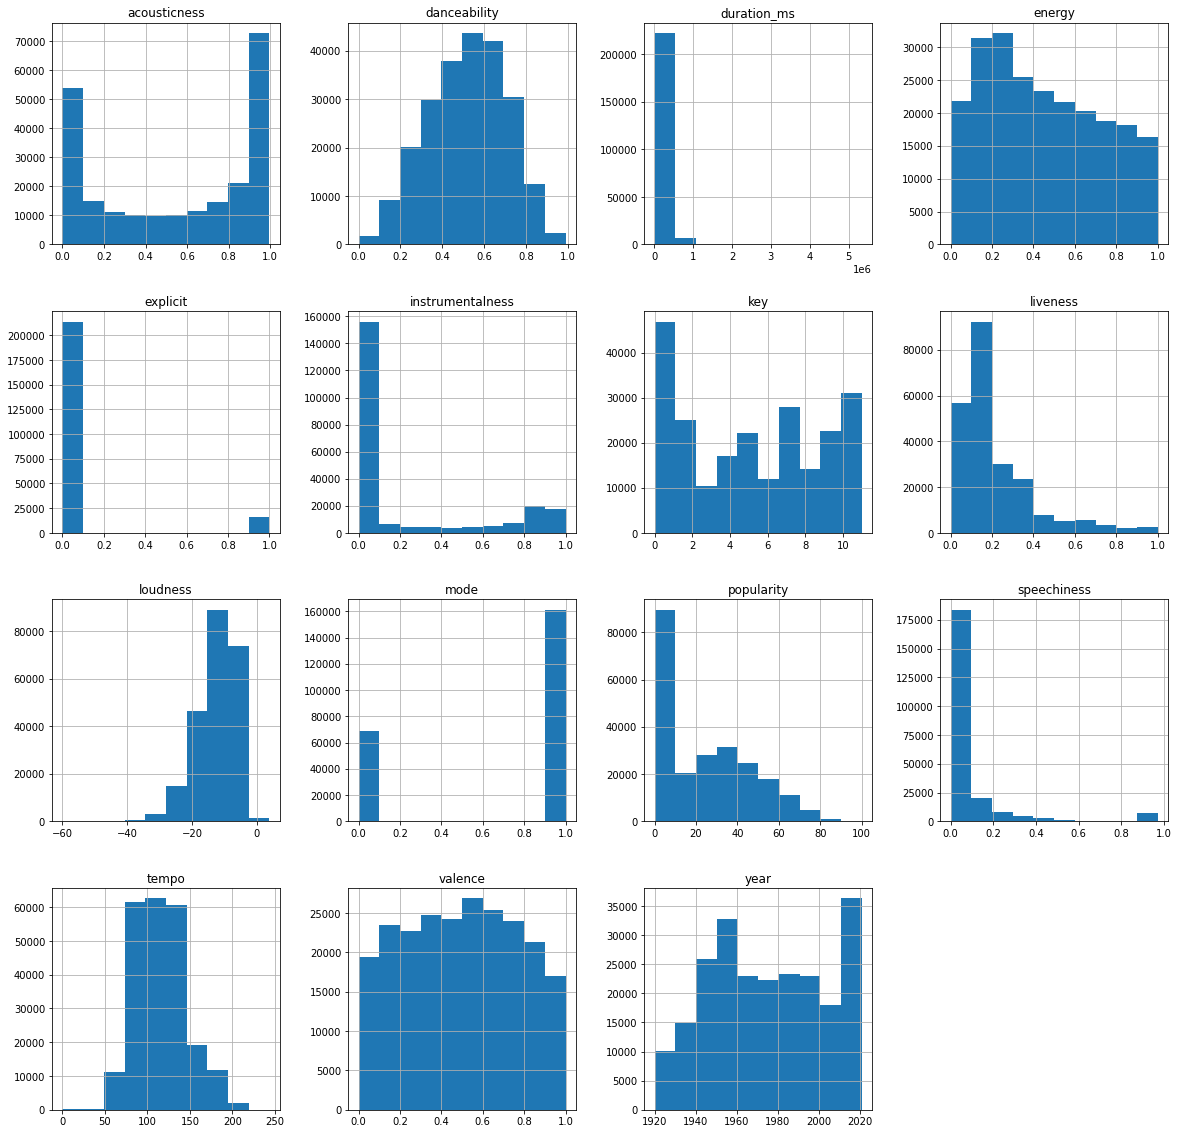

In [ ]:
df.hist(figsize=(20, 20))
plt.show()


###Visualizations of Aggregated Forms Based on Features

We wanted to see which values are correlated in order to choose which feature combinations we are going to look further into, so we used a correlation heat map from seaborn.

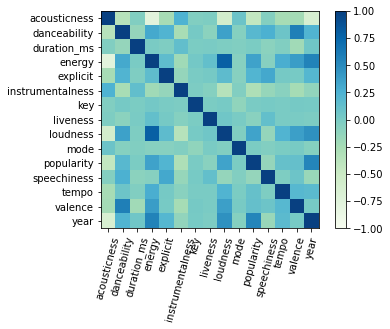

In [ ]:
corrs = df.corr()

plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.rcParams["figure.figsize"] = [6,6]
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

Now we are going to look the means of loudness, popularity, energy, loudness and acousticness by year. We are also going to check energy by loudness and valence by danceability.

In [ ]:
year = []
for index,row in df.iterrows():
    year.append(row.release_date[0:4])
df["year"] = year
df["year"] = df.year.astype(int)

year_set = set(year) 
unique_year = (list(year_set))
unique_year.sort()

Songs have gotten louder over years. The increase in slope seems to appear around 1950's, when rock music was founded, and has even a higher slope around 1960's(when rock music become popular wordwide according to brittanica encyclopedia) and forward so it might be corrolated with the emergence and popularity of Rock music.

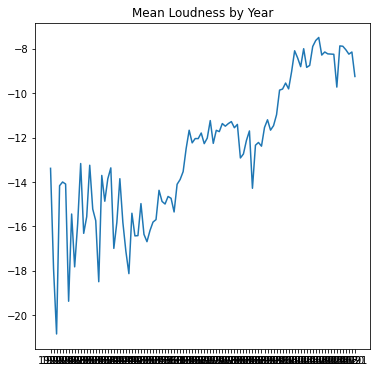

In [ ]:

x = unique_year
y = df.groupby("year").loudness.mean()

plt.plot(x,y)
plt.rcParams["figure.figsize"] = [50,9]
plt.title("Mean Loudness by Year")
plt.show()

The popularity of songs over the year shows us a unique graph. It would appear that songs were not as popular before 1960's. This era seems to have some importance.

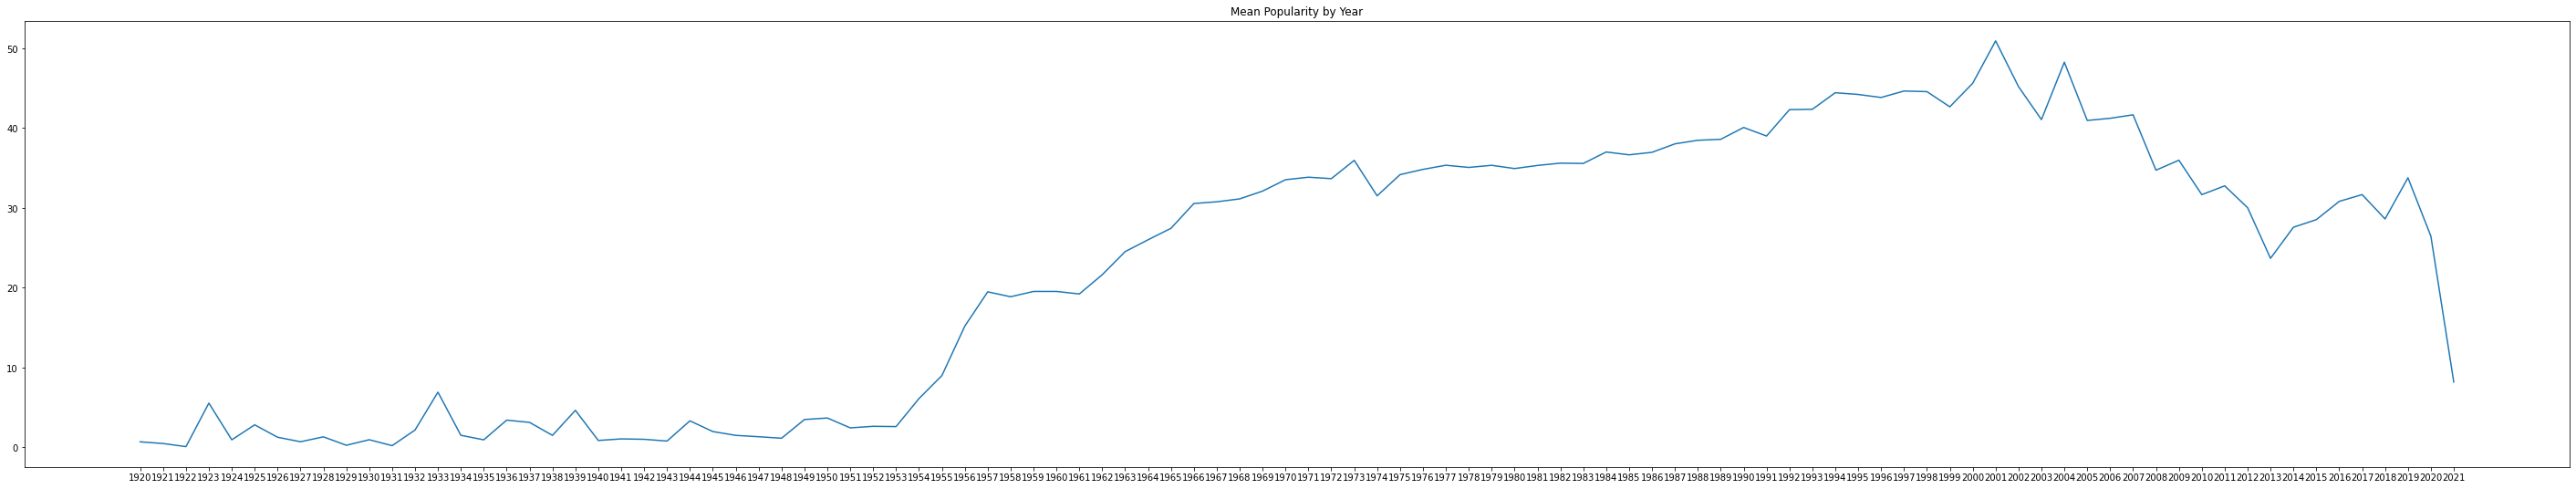

In [ ]:
x = unique_year
y = df.groupby("year").popularity.mean()

plt.plot(x,y)
plt.rcParams["figure.figsize"] = [50,9]
plt.title("Mean Popularity by Year")
plt.show()

Energy has been steadily increasing over the years and has only dipped in the recent years, which might be due to the sheer amount of songs over the past decade.

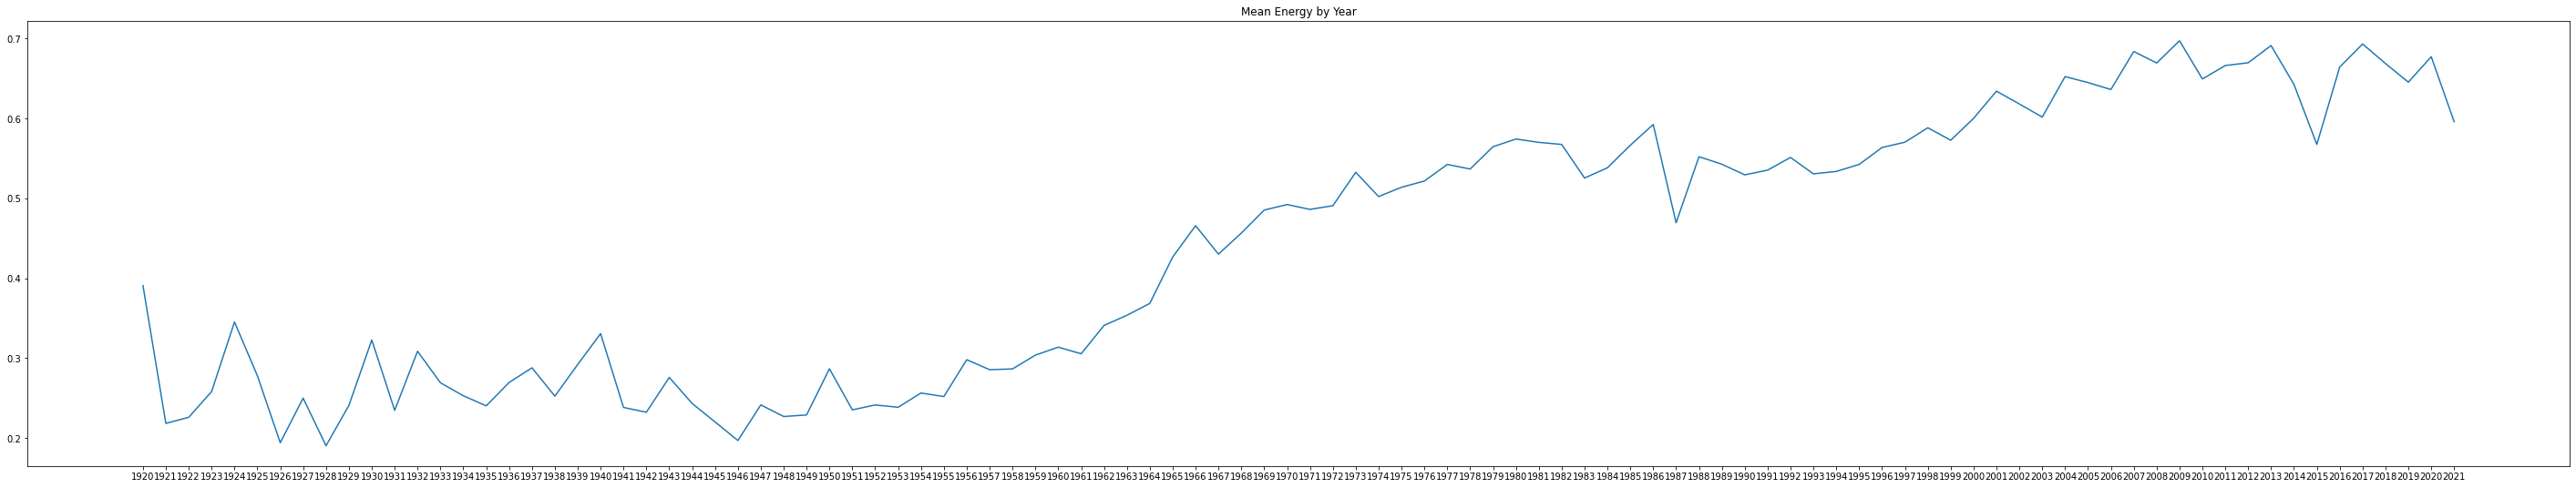

In [ ]:
x = unique_year
y = df.groupby("year").energy.mean()

plt.plot(x,y)
plt.rcParams["figure.figsize"] = [50,9]
plt.title("Mean Energy by Year")
plt.show()

Acousticness has gone down starting with 1950's and primarily 60's so there might be negative correlation over loudness with acousticness.


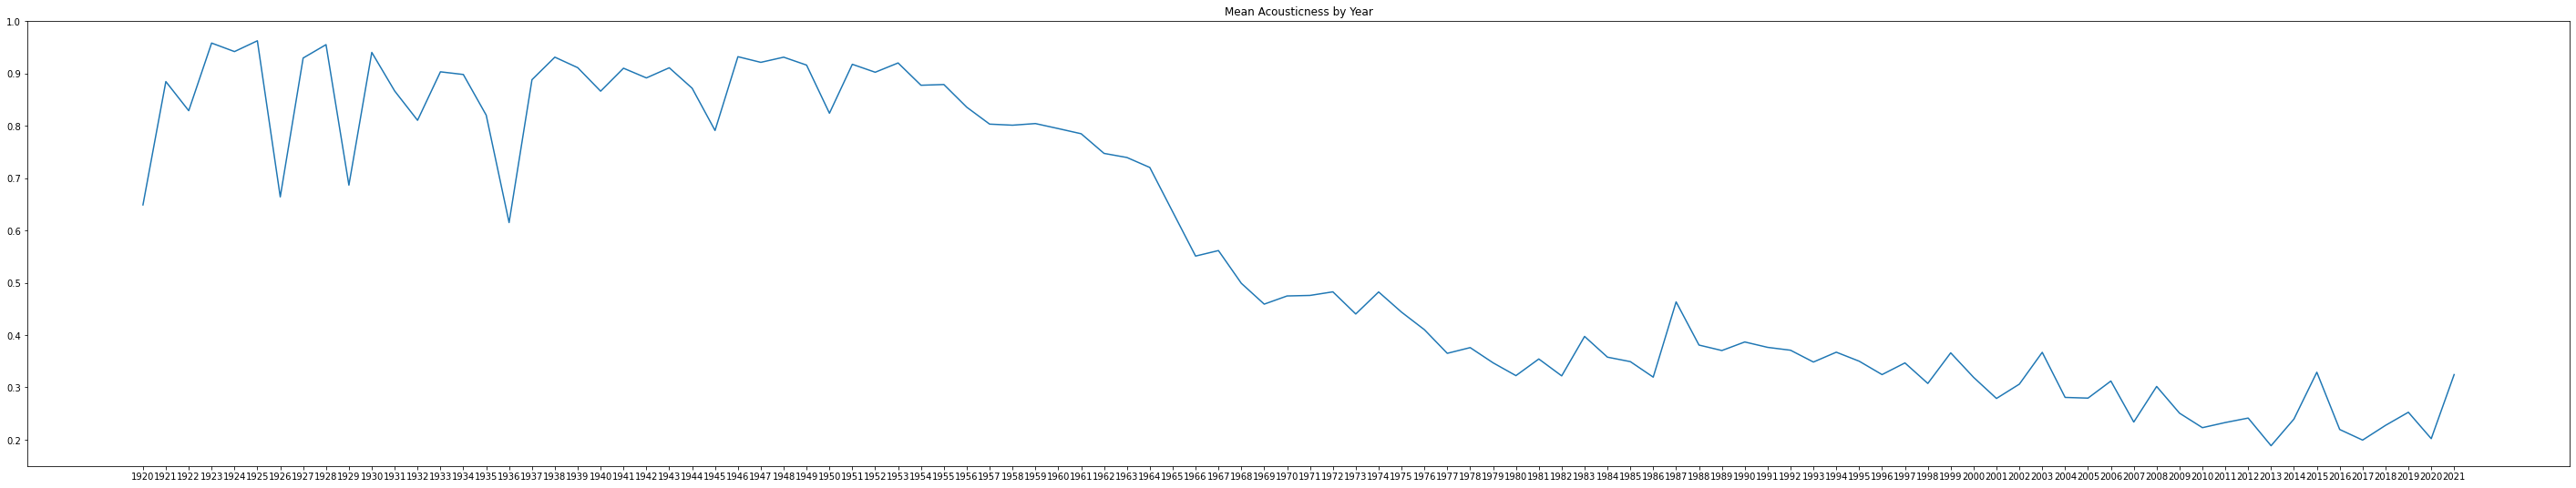

In [ ]:
x = unique_year
y = df.groupby("year").acousticness.mean()

plt.plot(x,y)
plt.rcParams["figure.figsize"] = [50,9]
plt.title("Mean Acousticness by Year")
plt.show()

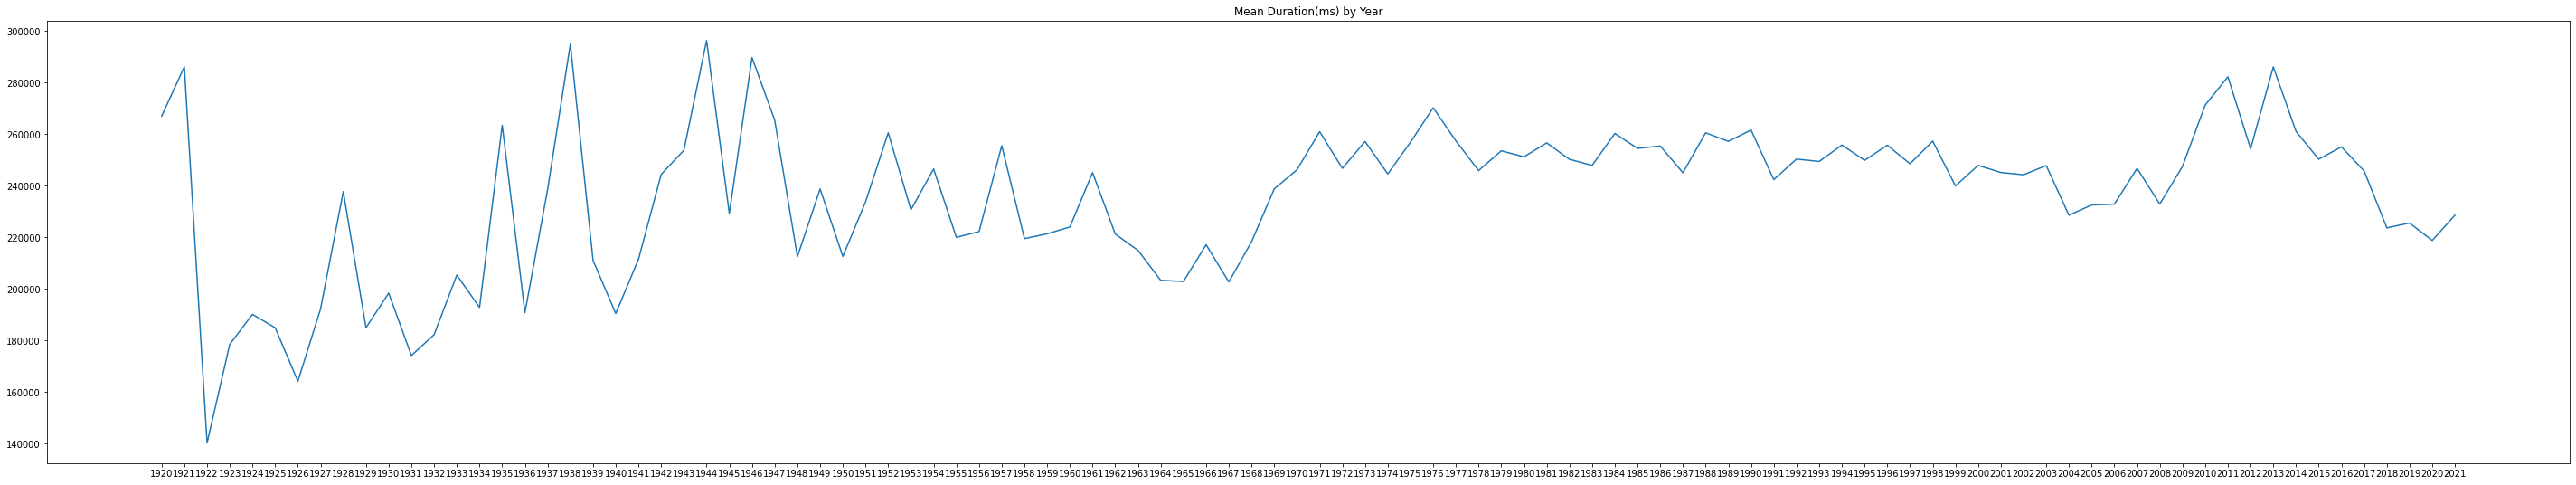

In [ ]:
x = unique_year
y = df.groupby("year").duration_ms.mean()

plt.plot(x,y)
plt.rcParams["figure.figsize"] = [50,9]
plt.title("Mean Duration(ms) by Year")
plt.show()

When the duration of the song increases, the loudness of the song also increases. This might be by the fact that rock and roll and metal like genres have longer durations compared to pop.

<Figure size 1152x576 with 0 Axes>

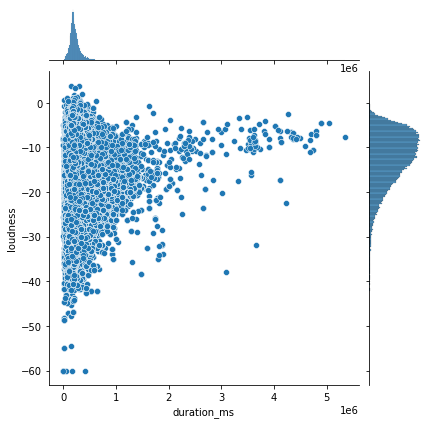

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=df['duration_ms'],y=df["loudness"],data = df)

The songs seem to get less happy(i.e valence) as the duration increases.

<Figure size 1152x576 with 0 Axes>

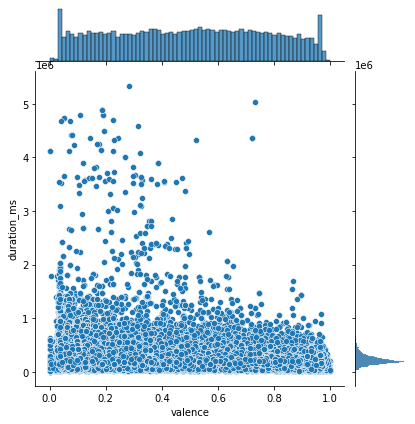

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=df['valence'],y=df["duration_ms"],data = df)

Here we merged all rock genres into one.

In [ ]:
df_rock = merged[merged['genres'].apply(lambda x: 'rock' in x)]
#rock with every value meaned
df_rock_mean = df_rock.groupby("year").mean()
df_rock_mean = df_rock_mean.reset_index()

print(df_rock_mean)

    year  acousticness_x  danceability_x  ...     key_y    mode_y       count
0   1920        0.198210        0.461417  ...  2.000000  1.000000   24.000000
1   1925        0.979500        0.438000  ...  1.500000  1.000000  517.000000
2   1927        0.961000        0.546000  ...  1.000000  1.000000   16.000000
3   1928        0.958833        0.368333  ...  3.750000  1.000000   54.750000
4   1929        0.980250        0.288250  ...  3.000000  1.000000   31.000000
..   ...             ...             ...  ...       ...       ...         ...
91  2017        0.203209        0.558516  ...  5.684211  0.852632   41.831579
92  2018        0.225513        0.547476  ...  5.934483  0.882759  191.327586
93  2019        0.240133        0.524508  ...  4.518033  0.891803  154.167213
94  2020        0.236374        0.551369  ...  4.250774  0.907121  103.969040
95  2021        0.273316        0.649298  ...  4.404255  0.914894  152.978723

[96 rows x 29 columns]


In [ ]:
df_rock.tail()

,acousticness_x,artists,danceability_x,duration_ms_x,energy_x,explicit,id,instrumentalness_x,key_x,liveness_x,loudness_x,mode_x,name,popularity_x,release_date,speechiness_x,tempo_x,valence_x,year,acousticness_y,danceability_y,duration_ms_y,energy_y,instrumentalness_y,liveness_y,loudness_y,speechiness_y,tempo_y,valence_y,popularity_y,key_y,mode_y,count,genres
218560,0.048000,I AM THEY,0.417,238307,0.524,0,72B1Omo2kmEst4YKO8vOB6,0.000000,10,0.103,-6.600,1,Scars,62,2018-03-02,0.0326,75.266,0.152,2018,0.048000,0.417,238307.0,0.524,0.000000,0.103,-6.600,0.0326,75.266,0.152,62.0,10,1,2,"['anthem worship', 'ccm', 'christian alternati..."
218582,0.956000,David Hodges,0.232,169643,0.359,0,2cBduBQZjD3grWVtgxrtnE,0.571000,0,0.700,-11.386,1,A Thousand Years (arr. L. Moore),0,2020-01-02,0.0403,104.580,0.153,2020,0.956000,0.232,169643.0,0.359,0.571000,0.700,-11.386,0.0403,104.580,0.153,0.0,0,1,1,['piano rock']
218605,0.000512,Damn-R,0.590,248700,0.972,0,3sTkysULqS5s5tPBJBQNIT,0.107000,0,0.277,-5.575,1,10 Years Hymn - Damn-R Remix,0,2019-12-27,0.0832,143.996,0.383,2019,0.000512,0.590,248700.0,0.972,0.107000,0.277,-5.575,0.0832,143.996,0.383,0.0,0,1,2,"['deathgrass', 'indiana indie', 'modern blues ..."
218633,0.001910,The Unlikely Candidates,0.652,245240,0.833,1,4GKcaqt6PFor4siHXMO42e,0.000536,10,0.122,-4.898,1,Novocaine,65,2019-03-22,0.0392,116.043,0.231,2019,0.001910,0.652,245240.0,0.833,0.000536,0.122,-4.898,0.0392,116.043,0.231,65.0,10,1,2,"['fort worth indie', 'indie poptimism', 'moder..."
218636,0.011100,Badflower,0.505,259520,0.839,1,7w09r53aPON8ZUvEAnPe94,0.000000,11,0.211,-4.966,0,Ghost,63,2019-02-22,0.0569,139.961,0.326,2019,0.011100,0.505,259520.0,0.839,0.000000,0.211,-4.966,0.0569,139.961,0.326,63.0,11,0,2,"['modern alternative rock', 'modern rock', 'po..."


Unique genres of rock music.

In [ ]:
df_rock['genres'].unique()

array(["['chillwave', 'indie rock', 'indie soul', 'kiwi rock', 'neo-psychedelic', 'new rave', 'portland hip hop', 'psychedelic pop']",
       "['garage rock revival', 'indie garage rock', 'indie surf']",
       "['celtic punk', 'celtic rock', 'folk punk', 'punk']", ...,
       "['piano rock']",
       "['deathgrass', 'indiana indie', 'modern blues rock', 'roots rock']",
       "['fort worth indie', 'indie poptimism', 'modern alternative rock', 'modern rock', 'rock']"],
      dtype=object)

Rock songs have only gotter louder but they have a similar slope with the rest of the songs over the years.

In [ ]:
data_year = "data_by_year.csv"
df_year = pd.read_csv(join(path_prefix, data_year))
axAcousticness_rock = df_year.plot(x = "year", y = "loudness")
sns.regplot(df_year["year"], df_year["loudness"], ci = None)
axAcousticness_rock.set_title("Change of Loudness in Rock Songs Over the Years")


FileNotFoundError: ignored

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=df_rock['year'],y=df_rock["loudness_x"],data=df_rock)

###Analysis of the Most Popular Artists and Songs

In this cell we can sort the songs by popularity which can give us the information about not just the most popular songs but the most popular artists as well.

In [ ]:
df.sort_values('popularity', ascending = False, inplace = True)
print(df.head(3232))

###How Songs of Different Genres Change Over Time

In this cell we can observe different types of genres changes in loudness over the years

In [ ]:
df_genre.sort_values('loudness',ascending = False, inplace = True)
print(df_genre.head(3232))

In this cell we can observe different types of genres changes in loudness over the years



In [ ]:
df_genre.sort_values('instrumentalness',ascending = False, inplace = True)
print(df_genre.head(3232))

## Hypothesis Testing


###Statistical tests to check if tempo contributes to the popularity of songs

We want to see if tempo affects the how popular a song is, so we start by checking the values of the columns we are going to investigate, and then creating 2 dataframes that are seperated from the mean value.

In [ ]:
from scipy.stats import ttest_ind
df['popularity'].describe()

In [ ]:
df['tempo'].describe()

In [ ]:
df_tempo_sample1 = df[df['popularity'] < 23]
df_tempo_sample2 = df[df['popularity'] >= 23]

We plot the distribution of tempo and see that is bell shaped, therefore it has normal distribution. 

In [ ]:
sns.displot(df, x='tempo')

Null Hypothesis ( $ H 0 $ ): Tempo does not effect song popularity.

Alternative Hypothesis ($ H 1 $): Tempo has statistically significant impact on song popularity.



In [ ]:
stat, p = ttest_ind(df_tempo_sample1['tempo'], df_tempo_sample2['tempo'],equal_var=False)
print('statistic=%.3f, p=%.3f' % (stat, p))

If we set the significance level as 0.05, we can reject the null hypothesis. 

###Statistical tests to check if significant differences exist between 80s and 90s rock


We divide our dataset into rock songs that were released in the 1980's and the 1990's. We then calculate the means of our datasets and visualize their distributions.

In [ ]:
rockdf_80s = df_rock.loc[(df_rock['year'] <= 1989) & (df_rock['year'] >= 1980)]
rockdf_90s = df_rock.loc[(df_rock['year'] <= 1999) & (df_rock['year'] >= 1990)]
TempoMean_80s = rockdf_80s['tempo_x'].mean()
print("Tempo Mean of 80s Rock Songs:", TempoMean_80s)
TempoMean_90s = rockdf_90s['tempo_x'].mean()
print("Tempo Mean of 90s Rock Songs", TempoMean_90s)

fig, ax = plt.subplots(1, 3, figsize=(14,6))  
rockdf_80s['tempo_x'].plot(kind="hist", ax=ax[0], bins=20, label="80s", color="c", density=True)
ax[0].set_title("Tempo Distribution of 80s Rock Songs")

rockdf_90s['tempo_x'].plot(kind="hist", ax=ax[1], bins=20, label="90s", color="m", density=True)
ax[1].set_title("Tempo Distribution of 90s Rock Songs")

sns.kdeplot(rockdf_80s['tempo_x'], shade=True, label= "80s Tempo", ax=ax[2], color="c")
sns.kdeplot(rockdf_90s['tempo_x'], shade=True, label= "90s Tempo", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("Tempo Distributions")
plt.show()

Null Hypothesis ( $ H0 $ ): Tempo in Rock did not change from 80's to 90's.

Alternative Hypothesis ($ H1 $): Tempo in rock increased from 80's to 90's.

In [ ]:
stat, p = ttest_ind(rockdf_80s['tempo_x'], rockdf_90s['tempo_x'],equal_var=False)
print('statistic=%.3f, p=%.3f' % (stat, p))

If we set the significance level as 0.05, we can reject the null hypothesis. In addition, the test score is positive which indicates that the mean tempo of 80's Rock is higher than 90's Rock.

##Machine Learning

**Goals**
*   Prediction of song popularity with various machine learning models
*   Efforts on hyper-parameter tuning to increase the performance of models
*   Creating a simple song recommendation system (The system can work as accepting a list of songs as input and returns a selected number of songs similar to the ones given in the input) using similarity metrics and Nearest Neighbors methods

**Expectations**

* Splitting training, validation, and test data correctly,
* Utilizing training, validation, and test data correctly,
>* Training data to train the model
>* Validation data to fine tune hyperparameters
(Or using cross validation for hyperparameter tuning)
>* Test data for the performance evaluation of the model

* Using normalization or scaling when necessary,
* Applying fitting evaluation metrics and interpreting them correctly.

###Splitting training, validation and test data


Split the data to train and test

In [ ]:
# For transformations and predictions
from scipy.optimize import curve_fit
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from six import StringIO

# For scoring
from sklearn.metrics import mean_squared_error as mse

# For validation
from sklearn.model_selection import train_test_split as split

# sns.set_theme(style="darkgrid")

First, we import a clean version of the data, without id, name, year and release_date and remove the duplicates.

In [ ]:
df.drop('id', inplace=True, axis=1)
df.drop('name', inplace=True, axis=1)
df.drop('release_date', inplace=True, axis=1)
df.drop('year', inplace=True, axis=1)
df.drop('key', inplace=True, axis=1)
df.drop('mode', inplace=True, axis=1)
# Remove duplicated
df = df[~df.duplicated()==1]
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence
0,0.991000,Mamie Smith,0.598,168333,0.224,0,0.000522,0.3790,-12.628,12,0.0936,149.976,0.6340
1,0.643000,NaN,0.852,150200,0.517,0,0.026400,0.0809,-7.261,7,0.0534,86.889,0.9500
2,0.993000,Mamie Smith,0.647,163827,0.186,0,0.000018,0.5190,-12.098,4,0.1740,97.600,0.6890
3,0.000173,Oscar Velazquez,0.730,422087,0.798,0,0.801000,0.1280,-7.311,17,0.0425,127.997,0.0422
4,0.295000,Mixe,0.704,165224,0.707,1,0.000246,0.4020,-6.036,2,0.0768,122.076,0.2990


We split the data into train and test data.

In [ ]:
df = df.sample(frac=0.3)
#Split the data to train and test
X_train, X_test, y_train, y_test = split(df.drop('popularity', axis=1), df['popularity'], test_size = 0.2, random_state = 12345)

This is to replace data of artists with numerical indicators that identify the artist.

In [ ]:
class ArtistsTransformer():
  """ This transformer recives a DF with a feature 'artists' of dtype object
      and convert the feature to a float value as follows:
      1. Replace the data with the artists mean popularity
      2. Replace values where artists appear less than MinCnt with y.mean()
      3. Replace values where artists appear more than MaxCnt with 0
      
      PARAMETERS:
      ----------
      MinCnt (int): Minimal treshold of artisits apear in dataset, default = 3
      MaxCnt (int): Maximal treshold of artisits apear in dataset, default = 600

      RERTURN:
      ----------
      A DataFrame with converted artists str feature to ordinal floats
  """

  def __init__(self, MinCnt = 3.0, MaxCnt = 600.0):
      self.MinCnt = MinCnt
      self.MaxCnt = MaxCnt
      self.artists_df = None
  
  def fit (self, X, y):
      self.artists_df =  y.groupby(X.artists).agg(['mean', 'count'])
      self.artists_df.loc['unknown'] = [y.mean(), 1]
      self.artists_df.loc[self.artists_df['count'] <= self.MinCnt, 'mean'] = y.mean()
      self.artists_df.loc[self.artists_df['count'] >= self.MaxCnt, 'mean'] = 0
      return self

  def transform(self, X, y=None):
      X['artists'] = np.where(X['artists'].isin(self.artists_df.index), X['artists'], 'unknown')
      X['artists'] = X['artists'].map(self.artists_df['mean'])
      return X

In [ ]:
# Apply AritistsTransformer on train and test seperatly
artists_transformer = ArtistsTransformer(MinCnt=2)
X_train = artists_transformer.fit(X_train, y_train).transform(X_train, y_train)
X_test = artists_transformer.transform(X_test, y_test)

In [ ]:
scaler = MinMaxScaler()
cols = ['artists','duration_ms','loudness','tempo']
X_train[cols] = scaler.fit_transform(X_train[cols])
X_test[cols] = scaler.fit_transform(X_test[cols])

In [ ]:
# Divide the popularity by 100
y_train = y_train / 100
y_test = y_test / 100

In [ ]:
nl = '\n'
print(f'X_train shape is: {X_train.shape} {nl}y_train shape is: {y_train.shape} {nl}X_test shape is: {X_test.shape} {nl}y_test shape is: {y_test.shape}')

X_train shape is: (53743, 12) 
y_train shape is: (53743,) 
X_test shape is: (13436, 12) 
y_test shape is: (13436,)


In [ ]:
X_train.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,speechiness,tempo,valence
113016,0.916,NaN,0.341,0.054897,0.1650,0,0.000000,0.127,0.653819,0.0533,0.726319,0.447
113822,0.913,NaN,0.473,0.321021,0.0492,0,0.000276,0.322,0.623880,0.0725,0.504448,0.122
23771,0.893,NaN,0.496,0.066237,0.4100,0,0.869000,0.143,0.837045,0.0669,0.322719,0.282
44963,0.734,NaN,0.420,0.028401,0.6810,0,0.009680,0.477,0.834784,0.0959,0.517566,0.391
19287,0.593,NaN,0.678,0.045668,0.4960,0,0.000000,0.412,0.925848,0.0340,0.385219,0.503


For features with (corr > 0.2)

###Linear Regression Model

In [ ]:
LR = LinearRegression()
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train))>0.2]

# Fit the model and
LR.fit(X_train.drop(columns=cols), y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train.drop(columns=cols)).clip(0, 1)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.5f}")

#Predicting with the model
y_test_pred = LR.predict(X_test.drop(columns=cols)).clip(0, 1)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.5f}")

RMSE Train = 0.00002
RMSE Test = 0.00002


For all  features

In [ ]:
LR = LinearRegression()

# Fit the model and
LR.fit(X_train, y_train)

# Train Predicting with the model
y_train_pred = LR.predict(X_train).clip(0, 1)

# RMSE Train
LR_rmse = np.sqrt(mse(y_train, y_train_pred))
print(f"RMSE Train = {LR_rmse:.6f}")

#Predicting with the model
y_test_pred = LR.predict(X_test).clip(0, 1)

# RMSE Test
LR_rmse = np.sqrt(mse(y_test, y_test_pred))
print(f"RMSE Test = {LR_rmse:.6f}")

RMSE Train = 0.000018
RMSE Test = 0.000018


In [ ]:
from IPython.display import display, Math

def get_printable_equt(df, inter, coef):
  equtation = '$y = ' + f'{inter:.2f} '
  
  for i, co in enumerate(coef):
    if i == len(coef) - 1:
        equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}$'
    else:
        equtation = equtation + f'+ {co:.2f} {(df.columns)[i]}'

  return display(Math(equtation))

get_printable_equt(X_train, LR.intercept_, LR.coef_)

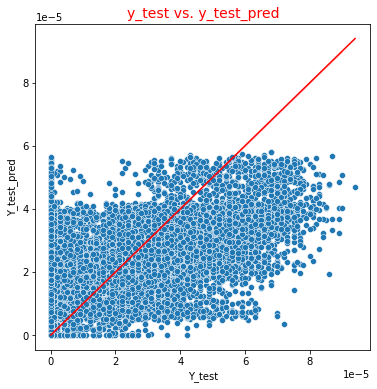

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=y_test, y=y_test_pred)
sns.lineplot(x=y_test, y=y_test, color='red', ax=ax)
ax.set_xlabel('Y_test')
ax.set_ylabel('Y_test_pred')
ax.set_title('y_test vs. y_test_pred', fontsize=14, color='red')
plt.show()

With the help of the interactive plot above, we are able to observe how well our regression line fits to the data we have. 


We can see our R-squared value is	0.843. This shows the proportion of varience by our features.


In [ ]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             popularity   R-squared (uncentered):                   0.678
Model:                            OLS   Adj. R-squared (uncentered):              0.678
Method:                 Least Squares   F-statistic:                          1.031e+04
Date:                Sat, 29 May 2021   Prob (F-statistic):                        0.00
Time:                        20:08:40   Log-Likelihood:                      5.0938e+05
No. Observations:               53743   AIC:                                 -1.019e+06
Df Residuals:                   53732   BIC:                                 -1.019e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
acousticness     -1.626e-05    3.5e-07    -46.481      0.000   -1.69e-05   -1.56e-05
artists          -8.298e-22   2.79e-22     -2.970      0.003   -1.38e-21   -2.82e-22
danceability      9.144e-06   6.11e-07     14.974      0.000    7.95e-06    1.03e-05
duration_ms       1.243e-05   2.67e-06      4.651      0.000    7.19e-06    1.77e-05
energy           -5.144e-06   6.32e-07     -8.145      0.000   -6.38e-06   -3.91e-06
explicit          1.372e-05   3.49e-07     39.285      0.000     1.3e-05    1.44e-05
instrumentalness -1.042e-05   2.47e-07    -42.197      0.000   -1.09e-05   -9.93e-06
liveness         -7.521e-06   4.54e-07    -16.561      0.000   -8.41e-06   -6.63e-06
loudness          4.387e-05   8.27e-07     53.045      0.000    4.23e-05    4.55e-05
speechiness      -2.633e-05   4.95e-07    -53.224      0.000   -2.73e-05   -2.54e-05
tempo             7.091e-06   6.31e-07     11.242      0.000    5.86e-06    8.33e-06
valence          -4.136e-06   4.06e-07    -10.181      0.000   -4.93e-06   -3.34e-06
==============================================================================
Omnibus:                      584.530   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              596.954
Skew:                           0.251   Prob(JB):                    2.36e-130
Kurtosis:                       2.878   Cond. No.                     4.21e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.11e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###kNN Model

Due to long running time, we sampled the original data with frac = 0.3.

In [ ]:
RMSE_train, RMSE_test = [], []
  
for i in range(100,201,5):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_train_pred = knn.predict(X_train)
  knn_train_rmse = np.sqrt(mse(y_train, y_train_pred))
  RMSE_train.append(knn_train_rmse.round(3))
  y_test_pred = knn.predict(X_test)
  knn_test_rmse = np.sqrt(mse(y_test, y_test_pred))
  RMSE_test.append(knn_test_rmse.round(3))

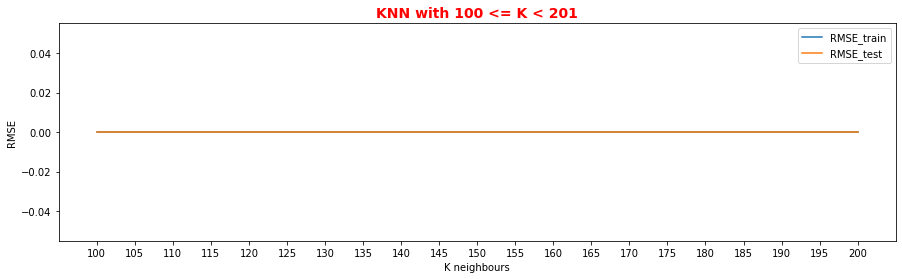

In [ ]:
fig, ax = plt.subplots(figsize=(15,4))
x = np.arange(100, 201, 5)
ax = sns.lineplot(x=x, y=RMSE_train)
sns.lineplot(x=x, y=RMSE_test, ax=ax)
# ax.axvline(x=180, ymin=0, ymax=0.3, color='blue')
# ax.axvline(x=139, ymin=0.5, ymax=0.8, color='orange')
ax.legend(labels=['RMSE_train', 'RMSE_test'], bbox_to_anchor=(1, 1))
ax.set_xticks(np.arange(100,201,5))
ax.set_xlabel('K neighbours')
ax.set_ylabel('RMSE')
ax.set_title('KNN with 100 <= K < 201', c='r', fontdict={'c':'r', 'fontsize':14, 'weight':'bold'})
plt.show()

In [ ]:
gap1 = [RMSE_test[num]-RMSE_train[num] for num, i in enumerate(RMSE_train)]
min(gap1).round(3)

0.0

In [ ]:
print(gap1.index(min(gap1)))
print(RMSE_train[14])#, RMSE_train.index(min(RMSE_train)))
print(RMSE_test[14])#, RMSE_test.index(min(RMSE_test)))
print(f'RMSE Train: {RMSE_train[14]}, RMSE_test: {RMSE_test[14]}')

0
0.0
0.0
RMSE Train: 0.0, RMSE_test: 0.0
